# Calculation of linear model for porosity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use("ggplot")

In [7]:
raw = pd.read_csv("porosity.csv", 
                  names=["dry", "wet", "void"],
                  header=0)
raw["wetSqd"] = raw["wet"]**2
raw.describe()

,dry,wet,void,wetSqd
count,11.000000,11.000000,11.000000,1.100000e+01
mean,1106.636364,1016.272727,0.517218,1.032938e+06
std,40.438281,11.858254,0.156935,2.422004e+04
min,1034.000000,1005.000000,0.282700,1.010025e+06
25%,1082.500000,1008.000000,0.377200,1.016064e+06
50%,1121.000000,1012.000000,0.586900,1.024144e+06
75%,1124.500000,1022.500000,0.641000,1.045562e+06
max,1179.000000,1036.000000,0.716500,1.073296e+06


## Conduct a linear regression on wet density

slope: -0.007526    intercept: 8.165275


Text(0,0.5,'Void volume fraction')

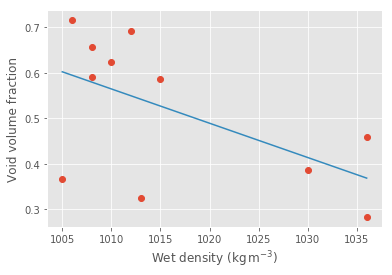

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(raw["wet"], raw["void"])
print("slope: %f    intercept: %f" % (slope, intercept))


plt.plot(raw["wet"], raw["void"], 'o')
plt.plot(raw["wet"], intercept + raw["wet"]*slope)
plt.xlabel("Wet density ($\mathrm{kg\, m^{-3}}$)")
plt.ylabel("Void volume fraction")

We will therefore describe the porosity as a linear model of wet density.

The equation we will use is 

$$
\epsilon = 8.17 - 7.5\times 10^{-3} \rho_{wet}
$$

## Linear regression on a 2nd order polynomial on wet density

In [9]:
from sklearn import linear_model

In [10]:
X = raw[["wet", "wetSqd"]].copy()
y = raw["void"]

lm = linear_model.LinearRegression()
model = lm.fit(X, y)

icept = model.intercept_
coeffs = model.coef_
print(model.coef_, model.intercept_)



[ 3.98707710e-01 -1.98894919e-04] -199.23241596621412


Text(0,0.5,'Void volume fraction')

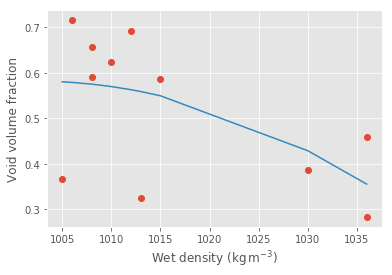

In [13]:
plt.plot(raw["wet"], raw["void"], 'o')
plt.plot(raw["wet"], icept + coeffs[0]*X["wet"] + X["wetSqd"]*coeffs[1])
plt.xlabel("Wet density ($\mathrm{kg\, m^{-3}}$)")
plt.ylabel("Void volume fraction")

In [ ]:
wet